# Titanic

Let's go)

------------


**Часть 1: Анализ данных:**

1) Анализ особенностей.

2) Поиск любых отношений или трендов с учетом множества фич.

**Часть 2: Разработка функций и очистка данных:**

1) Добавление нескольких фич.

2) Удаление избыточных фич.

3) Преобразование фич в подходящую вид для моделирования.

**Часть 3: Прогностическое моделирование**

1) Выполнение основных алгоритмов.

2) Кросс-валидация.

3) Ensembling.

4) Важные особенности Экстракция.

## Часть 1: Анализ данных:

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_csv('data/train.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Посмотрим сколько у нас пропусков в данных.

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Возраст (Age), каюта (Cabin) и порт высадки (Embarked) имеют NaN значения. Попробуем это пофиксить.

**Статистика выживших:**

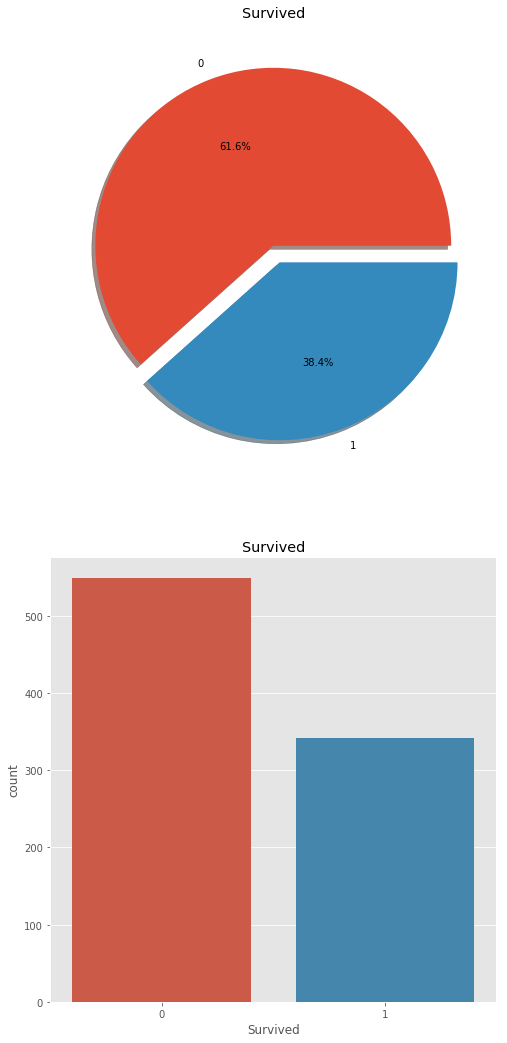

In [8]:
f,ax=plt.subplots(2,1,figsize=(8,18))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Из 891 пассажира в тренировочной выборке выживших всего ~350 человек.Тоесть 38,4% от всей тренеровочной выборки пережили катастрофу. Нужно пойти глубже, чтобы лучше понять данные и посмотреть, какие категории пассажиров выжили, а какие нет.

Мы постараемся проверить уровень выживаемости, используя различные особенности набора данных. Некоторые из особенностей - Пол (Sex), Порт Высадки (Embarked), Возраст (Age) и т.д.

## Анализ фич

### Пол (Sex)

In [9]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

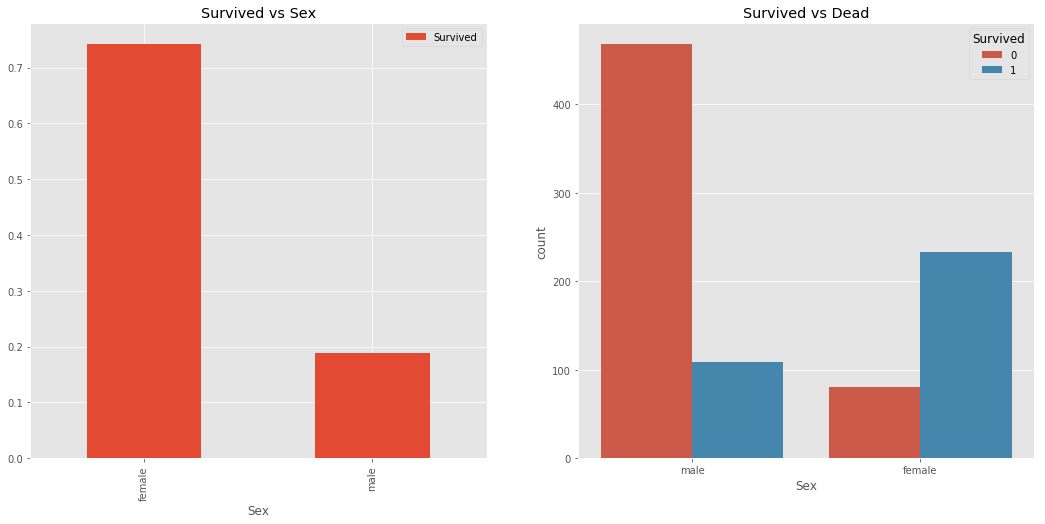

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived vs Dead')
plt.show()

Похоже мы нашли нечто интересное. Во первых, количество мужчин на корабле сильно больше чем женьщин. Еще, количество спасенных женьщин в два раза больше чем мужчин. В среднем женьщина спасется с вероятностью в 75%, а мужчина с вероятностью 19%. Боль.

Эта фича выглядит давольно важной, посмотрим остальные.

### Класс состоятельности

1st = Высший класс

2nd = Средний класс

3rd = Низший класс

In [11]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


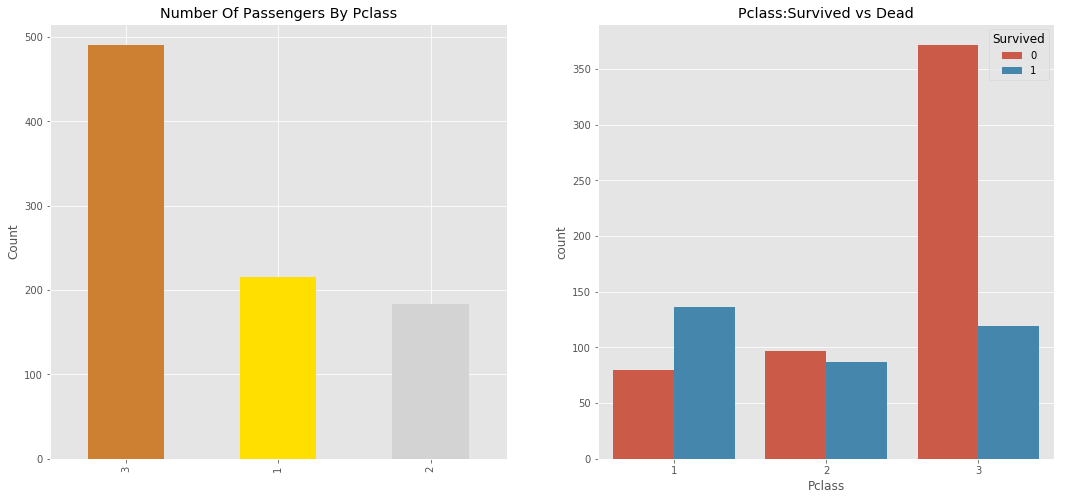

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

На данных графиках отчетлво видно что пассажиры первого класса получают высокий приоритет на спасение. Несмотря на то, что количество пассажиров третьего класса на много больше чем первого, выживаемостьу них составляет около 25%. 
Для пассажиров первого класса выживаемость составляет около 64%, второй класс - 48%. Как мы видим, деньги играют важную роль. Hello cruel world.

Проверим выживаемость по полу и классу.

In [13]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

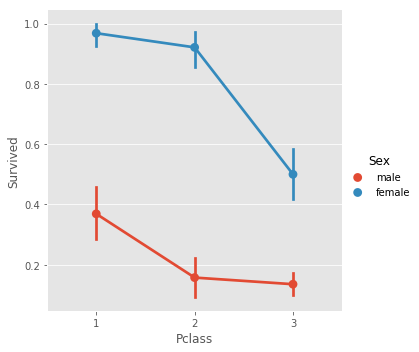

In [14]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

Заюзаем **FactorPlot** , будет луше видно разделение на категории.

Подведя итог по этим двум графикам, можно сказать, женьщины первого класса выживают с 95% вероятностью, так как умерли 3 из 94 женьщин первого класса.

В принципе женьщинам был предоставлен приоритет во время спасения, даже по сравнению с мужчинами первого класса.

Попробуем дальше посмотреть класс пассажиров.

### Возраст (Age)

In [15]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


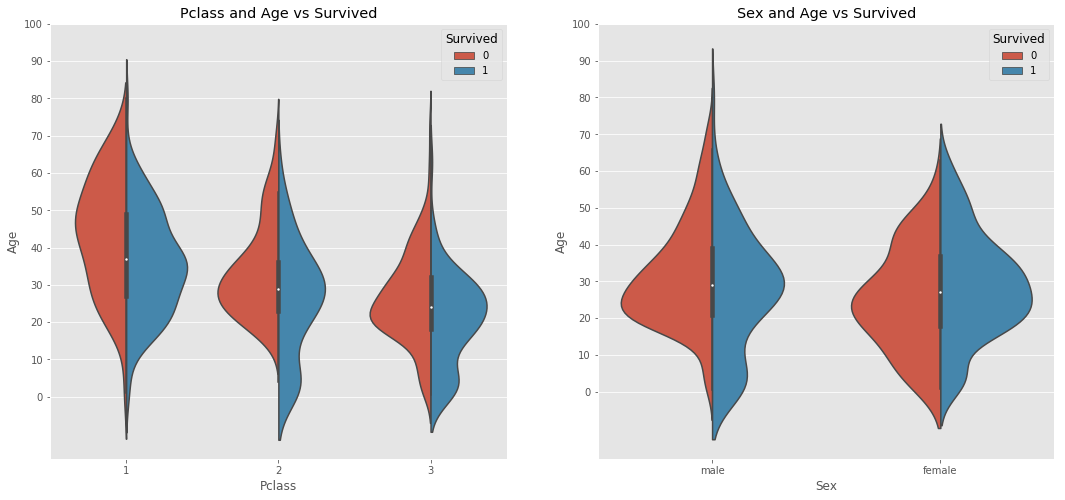

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Что мы выяснили:

1) Количество дитей растет вместе с классом пассажиров и шанс выживания для детей младше 10 лет, выглядит хорошо независимо от класса.

2) Шанс выживания пассажиров в возрасте 20-50 лет из класса 1 высоки, даже выше чем для женьщин.

3) Для мужчин, шанс выживания падает с ростом возраста.


Так же как мы и писали ранее, в данных о возрасте есть пропуски. Решить эту проблему можно заменив NaN на средний возраст. Правда тут появляется небольшая проблема, разброс возрастов очень велик и может выйти так что мы присвоим 7-летнему мальчику, 30 лет. Нужно найти способ избежать таких случаев. В глаза бросается приписка к имени Mr или Mrs. 

In [17]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

Регулярка как раз допускает все буквы до точки.

Выведем все обращения:

In [18]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Заменим все "кривые" обращения на Mrs, Ms, Miss.

In [19]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

Глянем распределение обращений:

In [20]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Заменим значения NaN в соответствии с обращениями:

In [21]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

Проверим что все NaN были заменены:

In [22]:
data.Age.isnull().any()

False

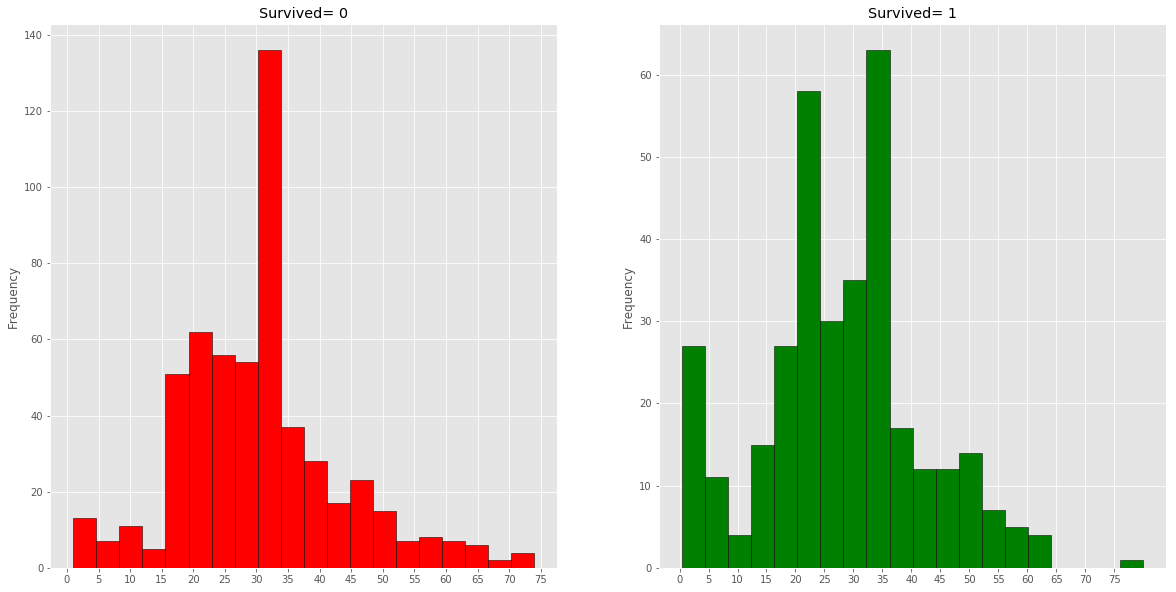

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,80,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,80,5))
ax[1].set_xticks(x2)
plt.show()

1) Малыши (возраст < 5) многие спасены.

2) Пожилые пассажиры также многие спасены.

3) Большая часть смертей лежит на пассажирах 30-40 лет.


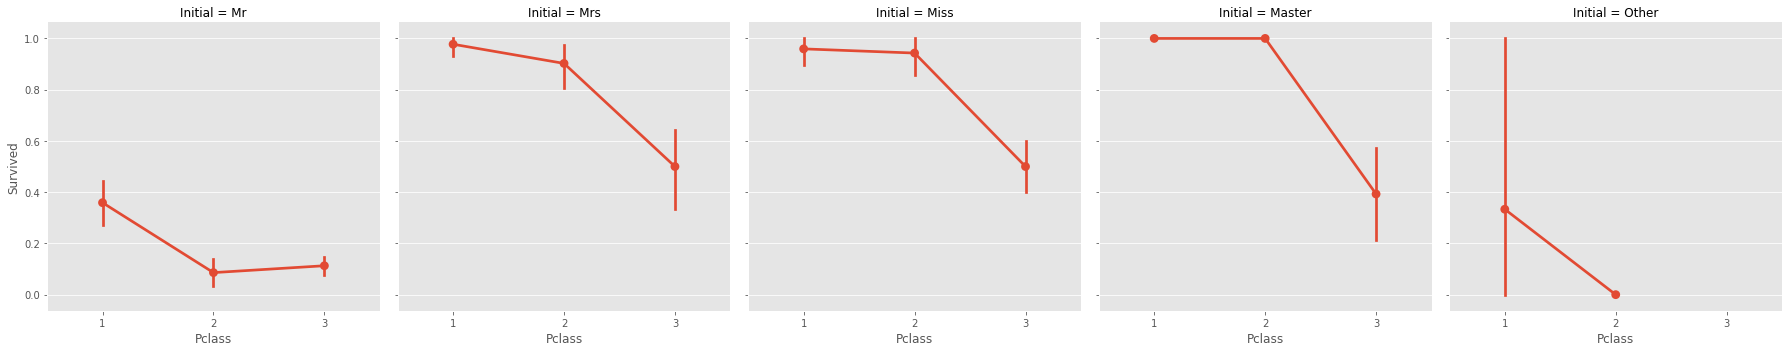

In [24]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

Таким образом, политика «Женщины и ребенок» остается верной независимо от класса.

### Порт посадки



In [25]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

**Шнас выжить в зависимости от порта посадки**

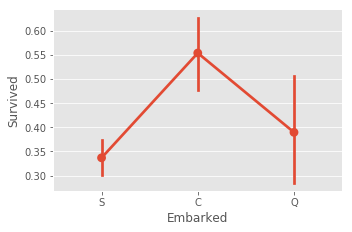

In [26]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

Шанс выживания для порта высадки С наиболее высокий, около 0.55, а самый низкий в S.

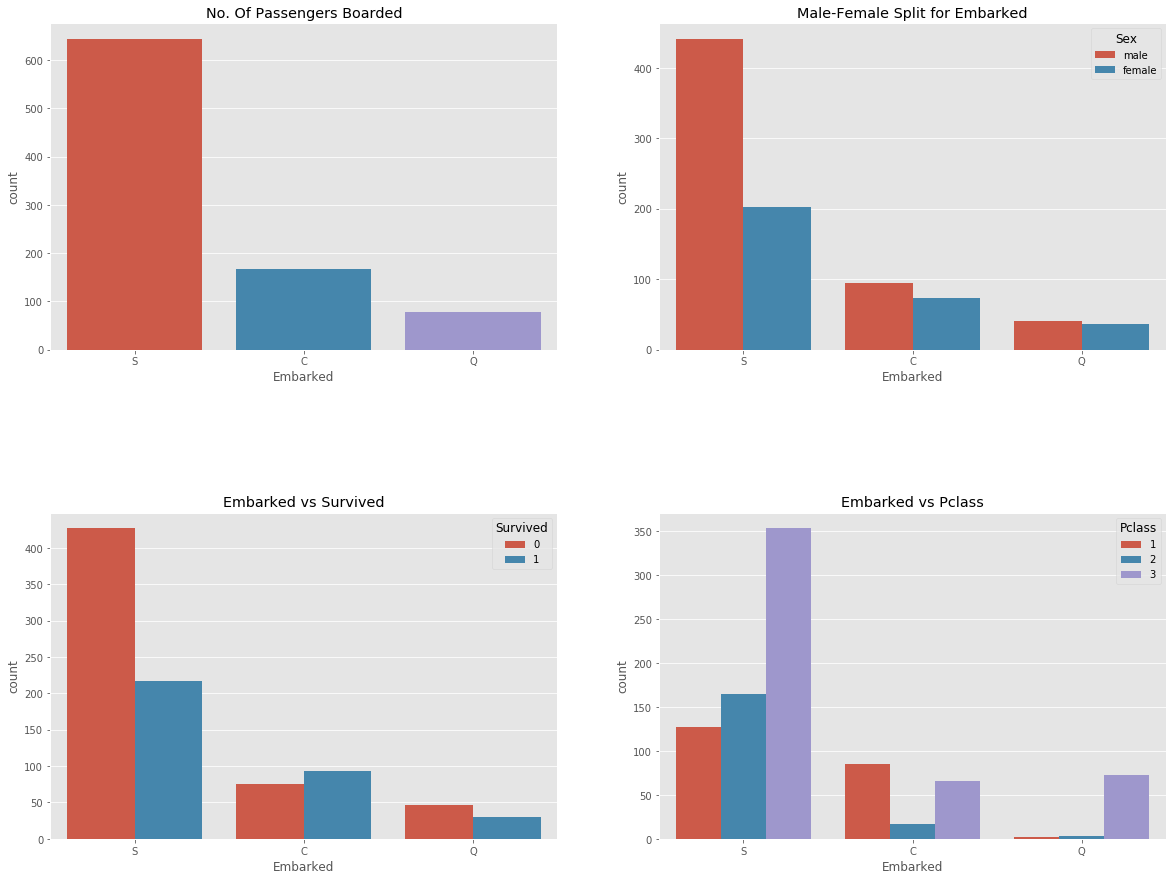

In [27]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

1) Большая часть пассажиров села в порту S. Оснавная часть из которых относится к классу 3.

2) Пассажиры из порта С тоже имеют неплохой шанс выживания. Возможно причиной этого может являться то, что ввсе они из класса 1 и 2.

3) В порту S садились наиболее богатые люди. Их вероятность выживания оказалось давольно низкой, это связано с тем, что они все класса 3, которых погибло около 81%.

4) С порта Q 95% пассажиров класса 3.

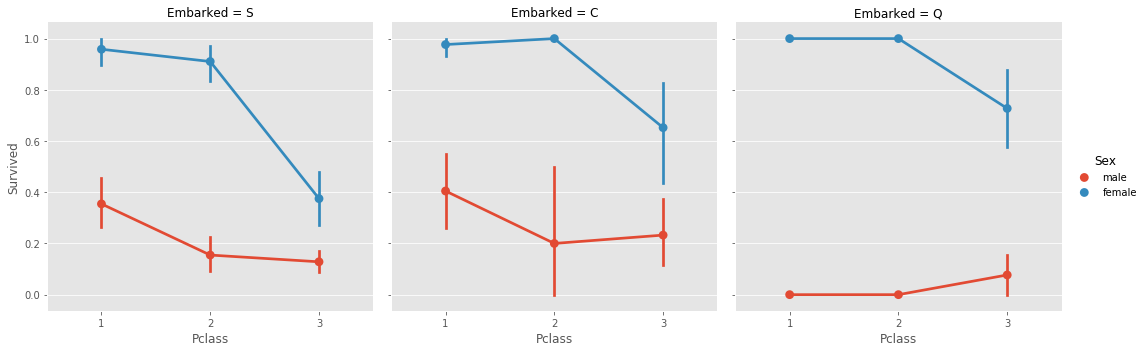

In [28]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()


1) Шанс выживаня всегда 1 для женьщин, что для класса 1 или 2, класс не влияет на вероятность.

2) Порт S выглядит не очень "удачливым" для пассажиров класса 3, шанс выживания что женьщин, что мужчин очень низкий. 

3) Порт Q более неудачлив для мужчин, поскольку все они из класса 3.

В данных о порту посадки есть пропуски, заполним их портом S так как он у большинства.

In [30]:
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()

False

### SibSip

Этот признак описывает был пассажир один или с семьей.

Sibling = брат, сестра, сводный брат, сводная сестра

Spouse = муж, жена


In [31]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


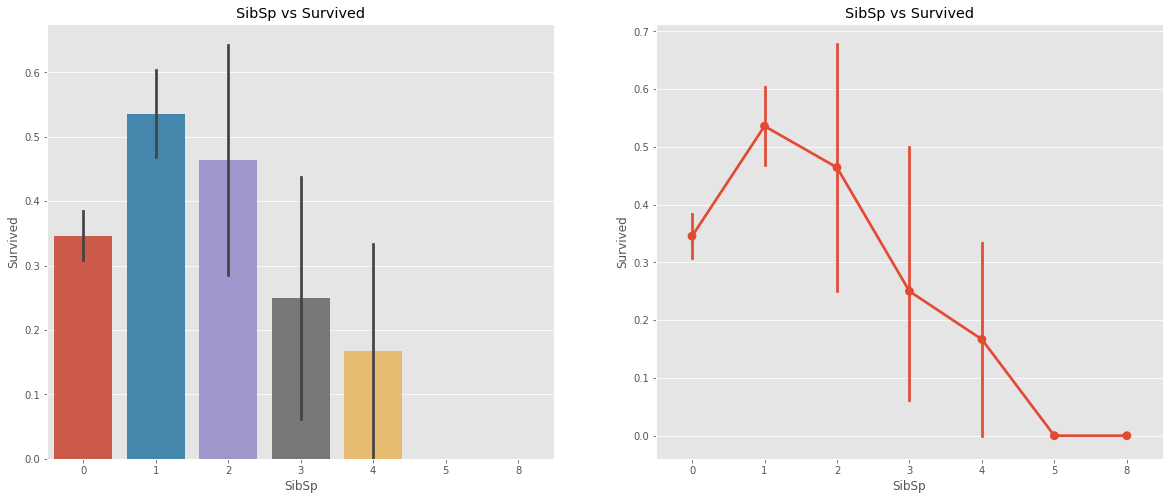

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()